In [1]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the Flight cancellation dataset
flight_data_df = pd.read_csv("flights_sample_3m.csv")
flight_data_df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(len(flight_data_df))

3000000


In [4]:
dep_df = flight_data_df[['FL_DATE','ORIGIN_CITY','DEP_DELAY']]

In [5]:
dep_df = dep_df.loc[(dep_df["DEP_DELAY"] > 0)]
dep_df["ORIGIN_STATE"] = dep_df["ORIGIN_CITY"].str.rsplit(',').str[-1]

In [6]:
display(dep_df)

,FL_DATE,ORIGIN_CITY,DEP_DELAY,ORIGIN_STATE
2,2022-07-22,"Denver, CO",6.0,CO
5,2019-07-31,"Dallas, TX",147.0,TX
10,2021-06-11,"Atlanta, GA",69.0,GA
12,2021-08-05,"Chicago, IL",6.0,IL
15,2022-05-01,"Baltimore, MD",3.0,MD
...,...,...,...,...
2999978,2019-11-11,"Detroit, MI",201.0,MI
2999982,2023-01-03,"Salt Lake City, UT",20.0,UT
2999988,2019-04-16,"San Francisco, CA",224.0,CA
2999991,2021-12-03,"Minneapolis, MN",8.0,MN


In [7]:
# Identify the variables in dataframe 
flight_data_df.dtypes

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

In [8]:
# convert the 'date' column to a date data type
flight_data_df['FL_DATE'] = pd.to_datetime(flight_data_df['FL_DATE'])

# print the data types of the columns
print(flight_data_df.dtypes)

FL_DATE                    datetime64[ns]
AIRLINE                            object
AIRLINE_DOT                        object
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST                               object
DEST_CITY                          object
CRS_DEP_TIME                        int64
DEP_TIME                          float64
DEP_DELAY                         float64
TAXI_OUT                          float64
WHEELS_OFF                        float64
WHEELS_ON                         float64
TAXI_IN                           float64
CRS_ARR_TIME                        int64
ARR_TIME                          float64
ARR_DELAY                         float64
CANCELLED                         float64
CANCELLATION_CODE                  object
DIVERTED                          float64
CRS_ELAPSED_TIME                  

In [9]:
# Filter the two year (2020 & 2021) data 
df_year_2020to2021 = flight_data_df.loc[(flight_data_df['FL_DATE'] >= '2020-01-01')&(flight_data_df['FL_DATE'] <= '2021-12-31'), :]

In [10]:
# Data reduced from 3000000 to 1090983
print(len(df_year_2020to2021))

1090983


In [11]:
df_year_2020to2021

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN
10,2021-06-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2820,ATL,"Atlanta, GA",BDL,"Hartford, CT",...,0.0,142.0,133.0,115.0,859.0,60.0,0.0,0.0,0.0,0.0
11,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",...,0.0,171.0,176.0,151.0,1061.0,NaN,NaN,NaN,NaN,NaN
12,2021-08-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,430,MDW,"Chicago, IL",BNA,"Nashville, TN",...,0.0,80.0,75.0,59.0,395.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999984,2021-12-21,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,660,ATL,"Atlanta, GA",LAS,"Las Vegas, NV",...,0.0,271.0,272.0,248.0,1747.0,NaN,NaN,NaN,NaN,NaN
2999985,2021-08-26,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,2954,DFW,"Dallas/Fort Worth, TX",LAS,"Las Vegas, NV",...,0.0,167.0,163.0,137.0,1055.0,NaN,NaN,NaN,NaN,NaN
2999987,2020-09-26,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1555,BNA,"Nashville, TN",MCO,"Orlando, FL",...,0.0,110.0,98.0,82.0,616.0,NaN,NaN,NaN,NaN,NaN
2999991,2021-12-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1146,MSP,"Minneapolis, MN",SNA,"Santa Ana, CA",...,0.0,245.0,229.0,199.0,1522.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# df_1 is the copy of dataframe df_year_2020to2021
df_1 = df_year_2020to2021.copy()
df_1

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN
10,2021-06-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2820,ATL,"Atlanta, GA",BDL,"Hartford, CT",...,0.0,142.0,133.0,115.0,859.0,60.0,0.0,0.0,0.0,0.0
11,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",...,0.0,171.0,176.0,151.0,1061.0,NaN,NaN,NaN,NaN,NaN
12,2021-08-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,430,MDW,"Chicago, IL",BNA,"Nashville, TN",...,0.0,80.0,75.0,59.0,395.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999984,2021-12-21,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,660,ATL,"Atlanta, GA",LAS,"Las Vegas, NV",...,0.0,271.0,272.0,248.0,1747.0,NaN,NaN,NaN,NaN,NaN
2999985,2021-08-26,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,2954,DFW,"Dallas/Fort Worth, TX",LAS,"Las Vegas, NV",...,0.0,167.0,163.0,137.0,1055.0,NaN,NaN,NaN,NaN,NaN
2999987,2020-09-26,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1555,BNA,"Nashville, TN",MCO,"Orlando, FL",...,0.0,110.0,98.0,82.0,616.0,NaN,NaN,NaN,NaN,NaN
2999991,2021-12-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1146,MSP,"Minneapolis, MN",SNA,"Santa Ana, CA",...,0.0,245.0,229.0,199.0,1522.0,NaN,NaN,NaN,NaN,NaN


In [13]:
#filter flight date, airline, origin city, dest city, departure delay and cancelled
sorted_df_1 = df_1[["FL_DATE","AIRLINE","ORIGIN_CITY","DEST_CITY","DEP_DELAY","CANCELLED"]]
sorted_df_1

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,DEP_DELAY,CANCELLED
4,2020-02-23,Spirit Air Lines,"Orlando, FL","Dallas/Fort Worth, TX",-2.0,0.0
9,2020-08-22,Alaska Airlines Inc.,"Seattle, WA","Fairbanks, AK",-9.0,0.0
10,2021-06-11,Delta Air Lines Inc.,"Atlanta, GA","Hartford, CT",69.0,0.0
11,2020-07-31,American Airlines Inc.,"Raleigh/Durham, NC","Dallas/Fort Worth, TX",-6.0,0.0
12,2021-08-05,Southwest Airlines Co.,"Chicago, IL","Nashville, TN",6.0,0.0
...,...,...,...,...,...,...
2999984,2021-12-21,Delta Air Lines Inc.,"Atlanta, GA","Las Vegas, NV",-3.0,0.0
2999985,2021-08-26,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",-3.0,0.0
2999987,2020-09-26,Southwest Airlines Co.,"Nashville, TN","Orlando, FL",-7.0,0.0
2999991,2021-12-03,Delta Air Lines Inc.,"Minneapolis, MN","Santa Ana, CA",8.0,0.0


In [14]:
# filter by 5 cities with departure delays  
top_5_cities_delay = df_1.groupby("ORIGIN_CITY")["DEP_DELAY"].sum().sort_values(ascending = False).reset_index().loc[:4,"ORIGIN_CITY"]

In [15]:
print(top_5_cities_delay)

0    Dallas/Fort Worth, TX
1              Chicago, IL
2               Denver, CO
3              Atlanta, GA
4              Houston, TX
Name: ORIGIN_CITY, dtype: object


In [16]:
# filter top-5 cities w.r.t. flight date, airline, flight number, origin city, dest city, cancelled 
sorted_top_5_cities_delay = sorted_df_1[sorted_df_1["ORIGIN_CITY"].isin(top_5_cities_delay)]

In [17]:
display(sorted_top_5_cities_delay)

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,DEP_DELAY,CANCELLED
10,2021-06-11,Delta Air Lines Inc.,"Atlanta, GA","Hartford, CT",69.0,0.0
12,2021-08-05,Southwest Airlines Co.,"Chicago, IL","Nashville, TN",6.0,0.0
32,2021-06-08,American Airlines Inc.,"Chicago, IL","Albuquerque, NM",1.0,0.0
34,2021-12-28,SkyWest Airlines Inc.,"Houston, TX","Boise, ID",30.0,0.0
39,2021-06-01,SkyWest Airlines Inc.,"Dallas/Fort Worth, TX","Billings, MT",-1.0,0.0
...,...,...,...,...,...,...
2999960,2020-09-24,Frontier Airlines Inc.,"Atlanta, GA","Denver, CO",-2.0,0.0
2999979,2020-10-16,Southwest Airlines Co.,"Atlanta, GA","Las Vegas, NV",-1.0,0.0
2999983,2021-05-08,American Airlines Inc.,"Chicago, IL","Miami, FL",0.0,0.0
2999984,2021-12-21,Delta Air Lines Inc.,"Atlanta, GA","Las Vegas, NV",-3.0,0.0


In [18]:
# Eliminate the 0 and negative values
filtered_df = sorted_top_5_cities_delay.loc[(sorted_top_5_cities_delay["DEP_DELAY"] > 0), ["FL_DATE", "AIRLINE", "ORIGIN_CITY", "DEST_CITY", "DEP_DELAY", "CANCELLED"]]
filtered_df["ORIGIN_STATE"] = filtered_df["ORIGIN_CITY"].str.rsplit(',').str[-1]

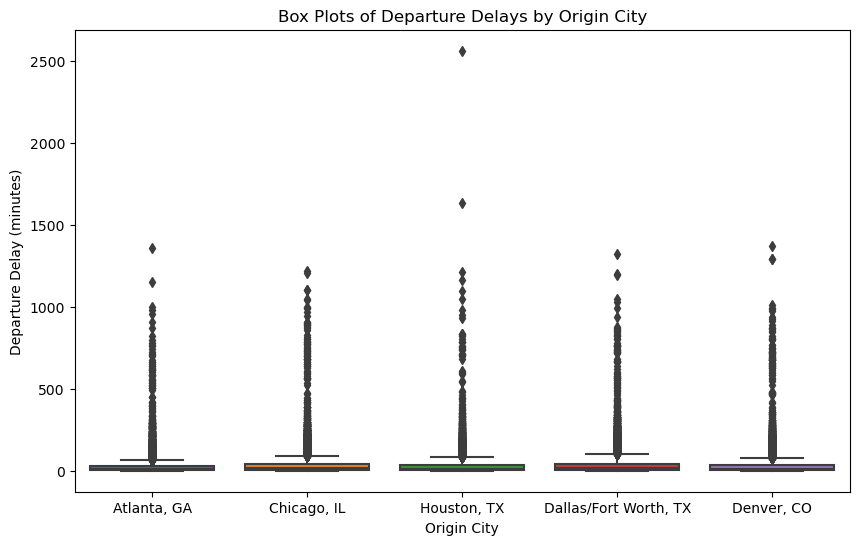

In [19]:
# Boxplot showing the departure delays (minutes) by origin city
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='ORIGIN_CITY', y='DEP_DELAY', data=filtered_df)
plt.title('Box Plots of Departure Delays by Origin City')
plt.xlabel('Origin City')
plt.ylabel('Departure Delay (minutes)')
plt.show()

Text(0, 0.5, 'departure delay mean')

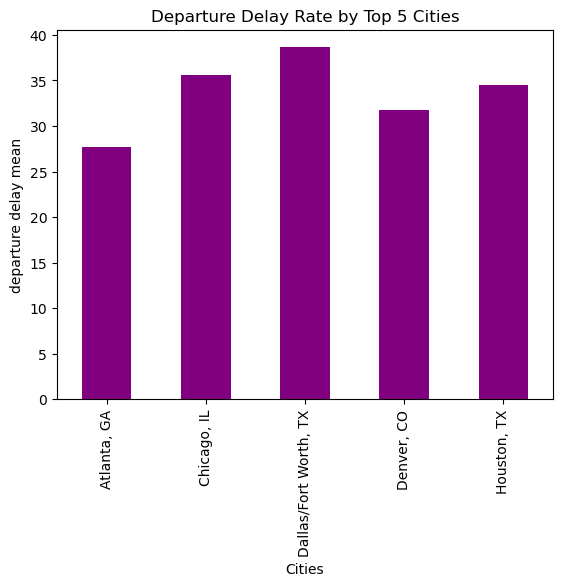

In [20]:
# Barchart showing the departure delays (minutes) by origin city
bargraph = filtered_df.groupby('ORIGIN_CITY')['DEP_DELAY'].mean().plot(kind='bar', color='purple')
#bargraph.yaxis.set_major_formatter(mtick.PercentFormatter())
bargraph.set_title('Departure Delay Rate by Top 5 Cities')
bargraph.set_xlabel('Cities')
bargraph.set_ylabel('departure delay mean')

In [21]:
mean_top_5_cities = filtered_df.groupby('ORIGIN_CITY')['DEP_DELAY'].mean()
print(mean_top_5_cities)

ORIGIN_CITY
Atlanta, GA              27.657951
Chicago, IL              35.654810
Dallas/Fort Worth, TX    38.635064
Denver, CO               31.728446
Houston, TX              34.522781
Name: DEP_DELAY, dtype: float64


In [22]:
median_top_5_cities = filtered_df.groupby('ORIGIN_CITY')['DEP_DELAY'].median()
print(median_top_5_cities)

ORIGIN_CITY
Atlanta, GA              12.0
Chicago, IL              15.0
Dallas/Fort Worth, TX    17.0
Denver, CO               14.0
Houston, TX              14.0
Name: DEP_DELAY, dtype: float64


In [23]:
# The mode could not be determined because there were no recurring values within the dataset under the category the top 5 cities with the most cancellations

In [24]:
# Describe the data 
filtered_df[['DEP_DELAY']].describe()

,DEP_DELAY
count,74408.000000
mean,33.661165
std,64.384066
min,1.000000
25%,5.000000
50%,14.000000
75%,37.000000
max,2565.000000
